# <span style="color:red">  Importing Necessary Packages

In [1]:
import nltk
import re
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.tag import *
import time
import itertools
from nltk import FreqDist
import pandas as pd 
import gzip 
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Satya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# <span style="color:red">  Importing Necessary Files for Task 1 & Task 2

In [3]:
def parse(path): 
    g = gzip.open(path, 'rb') 
    for l in g: 
        yield eval(l) 
        
def getDF(path): 
    i = 0 
    df = {} 
    for d in parse(path): 
        df[i] = d 
        i += 1 
    return pd.DataFrame.from_dict(df, orient='index') 

df_musical = getDF('C:/reviews_Musical_Instruments_5.json.gz')
df_garden = getDF('C:/reviews_Patio_Lawn_and_Garden_5.json.gz')
df_auto = getDF('C:/reviews_Automotive_5.json.gz')
df_tools = getDF('C:/reviews_Tools_and_Home_Improvement_5.json.gz')
df_musical= df_musical['reviewText']
df_garden= df_garden['reviewText']
df_auto= df_auto['reviewText']
df_tools= df_tools['reviewText']

# <span style="color:red">  TASK 1

In [4]:
def preprocessing(File):
    start_time = time.time()
    corpus=[]
    for i in range(0,len(File)): #len(df_musical)
        review= re.sub('[^a-zA-Z]',' ',File[i])
        review=review.lower().split()
        review=[word for word in review if not word in set(stopwords.words('english'))]
        #review=' '.join(review)
        corpus.append(review)
    end_time = time.time()
    return(start_time,end_time,corpus)

# <span style="color:purple">   Code and Output for File 1 - reviews_Musical_Instruments_5.json.gz

In [5]:
start_time ,end_time,corpus = preprocessing(df_musical) #
print("The Execution Time of the pre processing is %s seconds" % (end_time - start_time))

The Execution Time of the pre processing is 530.3509123325348 seconds


##### Finding Top 20 Most frequent Terms , nouns , adverbs/adjectives

In [5]:
#Frequent Terms
term_list=list(itertools.chain.from_iterable(corpus))
freq_terms = FreqDist(term_list)
pd.DataFrame(freq_terms.most_common(20))

,0,1
0,guitar,5612
1,one,4558
2,great,4121
3,like,3981
4,good,3811
5,use,3789
6,sound,3609
7,strings,3420
8,well,3236
9,get,2683


In [6]:
#Nouns
tagged_list = pos_tag(term_list)
noun_list = [word for word,pos in tagged_list if pos == 'NNP' or pos=='NN' or pos == 'NNS' or pos == 'NNPS']
freq_nouns = FreqDist(noun_list)
pd.DataFrame(freq_nouns.most_common(20))

,0,1
0,guitar,4756
1,strings,3361
2,use,2490
3,price,2240
4,sound,1935
5,quality,1684
6,time,1586
7,tone,1304
8,pedal,1251
9,guitars,1178


In [7]:
#Adjectives/Adverbs
adj_adv_list = [word for word,pos in tagged_list if pos == 'JJ' or pos=='JJR' or pos == 'JJS' or pos == 'RB' or pos == 'RBR' or pos == 'RBS']
freq_adj_adv = FreqDist(adj_adv_list)
pd.DataFrame(freq_adj_adv.most_common(20))

,0,1
0,great,4121
1,good,3768
2,well,3196
3,really,2243
4,little,2026
5,much,2001
6,also,1781
7,better,1630
8,nice,1628
9,easy,1414


# <span style="color:purple">   Code and Output for File 2 - reviews_Patio_Lawn_and_Garden_5.json.gz

In [8]:
start_time ,end_time,corpus = preprocessing(df_garden) #
print("The Execution Time of the pre processing is %s seconds" % (end_time - start_time))

The Execution Time of the pre processing is 1118.57257604599 seconds


##### Finding Top 20 Most frequent Terms , nouns , adverbs/adjectives

In [9]:
#Frequent Terms
term_list=list(itertools.chain.from_iterable(corpus))
freq_terms = FreqDist(term_list)
pd.DataFrame(freq_terms.most_common(20))

,0,1
0,one,9318
1,use,8109
2,like,6998
3,get,6159
4,well,5731
5,would,5691
6,feeder,5011
7,easy,4947
8,product,4709
9,time,4534


In [10]:
#Nouns
tagged_list = pos_tag(term_list)
noun_list = [word for word,pos in tagged_list if pos == 'NNP' or pos=='NN' or pos == 'NNS' or pos == 'NNPS']
freq_nouns = FreqDist(noun_list)
pd.DataFrame(freq_nouns.most_common(20))

,0,1
0,use,5473
1,product,4709
2,time,4534
3,water,4086
4,feeder,3707
5,trap,3486
6,birds,2562
7,plants,2518
8,way,2495
9,work,2314


In [11]:
#Adjectives/Adverbs
adj_adv_list = [word for word,pos in tagged_list if pos == 'JJ' or pos=='JJR' or pos == 'JJS' or pos == 'RB' or pos == 'RBR' or pos == 'RBS']
freq_adj_adv = FreqDist(adj_adv_list)
pd.DataFrame(freq_adj_adv.most_common(20))

,0,1
0,well,5656
1,easy,4690
2,good,4213
3,also,4104
4,great,4004
5,much,3938
6,little,3915
7,really,3650
8,even,3208
9,small,2993


# <span style="color:purple">   Code and Output for File 3 - reviews_Automotive_5.json.gz

In [12]:
start_time ,end_time,corpus = preprocessing(df_auto) #
print("The Execution Time of the pre processing is %s seconds" % (end_time - start_time))

The Execution Time of the pre processing is 898.2577328681946 seconds


In [13]:
#Frequent Terms
term_list=list(itertools.chain.from_iterable(corpus))
freq_terms = FreqDist(term_list)
pd.DataFrame(freq_terms.most_common(20))

,0,1
0,use,8201
1,car,8030
2,one,7362
3,well,5923
4,good,5905
5,great,5882
6,like,5825
7,product,5499
8,used,5030
9,would,4860


In [14]:
#Nouns
tagged_list = pos_tag(term_list)
noun_list = [word for word,pos in tagged_list if pos == 'NNP' or pos=='NN' or pos == 'NNS' or pos == 'NNPS']
freq_nouns = FreqDist(noun_list)
pd.DataFrame(freq_nouns.most_common(20))

,0,1
0,car,8030
1,product,5499
2,use,5471
3,time,3965
4,battery,2962
5,water,2604
6,price,2570
7,work,2568
8,oil,2543
9,quality,2065


In [15]:
#Adjectives/Adverbs
adj_adv_list = [word for word,pos in tagged_list if pos == 'JJ' or pos=='JJR' or pos == 'JJS' or pos == 'RB' or pos == 'RBR' or pos == 'RBS']
freq_adj_adv = FreqDist(adj_adv_list)
pd.DataFrame(freq_adj_adv.most_common(20))

,0,1
0,great,5882
1,well,5834
2,good,5797
3,easy,3564
4,much,3436
5,also,3153
6,really,3075
7,better,2780
8,little,2735
9,even,2437


# <span style="color:red">  TASK 2

### <span style="color:purple"> Function to Find ReviewSeqNo,T,M

In [34]:
def count_terms(File):
    start_time = time.time()
    ReviewSeqNo= []
    T=[]
    count1=0
    M=[]
    unique_list=set()
    all_unique_list = set()
    details = []
    for i in range(0,len(File)):
        review= re.sub('[^a-zA-Z]',' ',File[i])
        review=review.lower().split()
        review=[word for word in review if not word in set(stopwords.words('english'))]
        unique_list = set(review)
        count1+=len(review)
        all_unique_list.update(unique_list)
        ReviewSeqNo.append(i)
        T.append(count1)
        M.append(len(all_unique_list))
    end_time = time.time()
    return(start_time,end_time,ReviewSeqNo,T,M)

In [35]:
start_time,end_time,ReviewSeqNo,T,M = count_terms(df_tools)
print("The Execution Time of the pre processing is %s seconds" % (end_time - start_time))

The Execution Time of the pre processing is 6718.5046372413635 seconds


In [43]:
LogM= np.log10(M)
LogT= np.log10(T)

### <span style="color:purple"> plot log_10  𝑀 vs log_10⁡𝑇

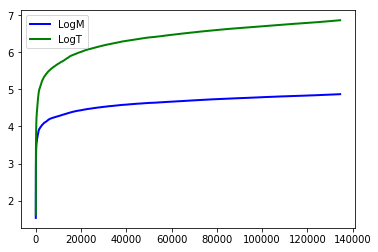

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
Dataset=pd.DataFrame({'SeqNo': ReviewSeqNo, 'LogM': LogM, 'LogT': LogT  })
plt.plot( 'SeqNo', 'LogM', data=Dataset, marker='', color='blue', linewidth=2)
plt.plot( 'SeqNo', 'LogT', data=Dataset, marker='', color='green', linewidth=2)
plt.legend()

# <span style="color:red"> THE END